# Billboard Music Charts with Spotify and Billboard data

## Spotify API data

The first data we will explore is the Billboard Hot 100 playlist from Spotify API.
The playlist is created and updated weekly by verified official Billboard account to display the top 100 trending songs in United States.

### Step 1: Get Data

In [1]:
# import credential from environment variables
# client_id and client_secret are unique identifiers for each user to connect to the spotify developer api. 
import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.environ.get('Client_ID')
CLIENT_SECRET = os.environ.get('Client_secret')

In [2]:
#import libraries
import pandas as pd
import numpy as np

# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# function get access token
# the credential (client_id and client_secret) are used to create access token to grant users access to spotify databases
from requests import post, get
import base64
import json

def get_token():
    auth_string = CLIENT_ID + ":" + CLIENT_SECRET
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes),'utf-8')
    
    auth_url = "https://accounts.spotify.com/api/token"
    auth_header = {
        'Authorization': 'Basic ' + auth_base64,
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    
    auth_data = {
        'grant_type': 'client_credentials'
    }
    result = post(auth_url, headers = auth_header, data=auth_data)
    json_result = json.loads(result.content)
    token = json_result['access_token']
    return token

def get_auth_header(token):
    return {'Authorization': "Bearer " + token}

token = get_token()

In [4]:
# function to retrieve playlist
def get_playlist(token, playlist_id):
    query_url = "https://api.spotify.com/v1/playlists/"+ playlist_id +"/tracks"
    
    headers = get_auth_header(token)
    result = get(query_url, headers=headers)
    json_result = json.loads(result.content)
    return json_result

In [5]:
# get data from the billboard hot 100 playlist on spotify    
billboard_hot_100_id = '6UeSakyzhiEt4NB3UAd6NQ'
billboard_hot_100_json = get_playlist(token, billboard_hot_100_id)['items']

### The playlist data from spotify contains multi-nested arrays and dictionaires, which needs to be flatten.

In [6]:
# create the billboard hot 100 playlist dataframe
# flatten the nested data
billboard_hot_100_df = pd.json_normalize(billboard_hot_100_json)

billboard_hot_100_df.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.preview_url,track.available_markets,track.explicit,track.type,track.episode,track.track,track.album.available_markets,track.album.type,track.album.album_type,track.album.href,track.album.id,track.album.images,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.uri,track.album.artists,track.album.external_urls.spotify,track.album.total_tracks,track.artists,track.disc_number,track.track_number,track.duration_ms,track.external_ids.isrc,track.external_urls.spotify,track.href,track.id,track.name,track.popularity,track.uri,track.is_local,video_thumbnail.url
0,2024-12-15T18:18:27Z,False,None,https://open.spotify.com/user/billboard.com,https://api.spotify.com/v1/users/billboard.com,billboard.com,user,spotify:user:billboard.com,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",album,album,https://api.spotify.com/v1/albums/61ulfFSmmxMh...,61ulfFSmmxMhc2wCdmdMkN,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Merry Christmas,1994-10-28,day,spotify:album:61ulfFSmmxMhc2wCdmdMkN,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/61ulfFSmmxMhc2w...,10,[{'external_urls': {'spotify': 'https://open.s...,1,2,241106,USSM19400325,https://open.spotify.com/track/0bYg9bo50gSsH3L...,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,94,spotify:track:0bYg9bo50gSsH3LtXe2SQn,False,None
1,2024-12-15T18:18:27Z,False,None,https://open.spotify.com/user/billboard.com,https://api.spotify.com/v1/users/billboard.com,billboard.com,user,spotify:user:billboard.com,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",album,album,https://api.spotify.com/v1/albums/34wa3zf2prXF...,34wa3zf2prXFMk47t9zHFG,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Merry Christmas From Brenda Lee,1964-10-19,day,spotify:album:34wa3zf2prXFMk47t9zHFG,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/34wa3zf2prXFMk4...,12,[{'external_urls': {'spotify': 'https://open.s...,1,1,126266,USMC15848998,https://open.spotify.com/track/2EjXfH91m7f8HiJ...,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,92,spotify:track:2EjXfH91m7f8HiJN1yQg97,False,None
2,2024-12-15T18:18:27Z,False,None,https://open.spotify.com/user/billboard.com,https://api.spotify.com/v1/users/billboard.com,billboard.com,user,spotify:user:billboard.com,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",album,single,https://api.spotify.com/v1/albums/6egzU9NKfora...,6egzU9NKfora01qaNbvwfZ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",LAST CHRISTMAS,1984-11-29,day,spotify:album:6egzU9NKfora01qaNbvwfZ,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/6egzU9NKfora01q...,3,[{'external_urls': {'spotify': 'https://open.s...,1,1,262960,GBBBM8400019,https://open.spotify.com/track/2FRnf9qhLbvw8fu...,https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...,2FRnf9qhLbvw8fu4IBXx78,Last Christmas,92,spotify:track:2FRnf9qhLbvw8fu4IBXx78,False,None
3,2024-12-15T18:18:27Z,False,None,https://open.spotify.com/user/billboard.com,https://api.spotify.com/v1/users/billboard.com,billboard.com,user,spotify:user:billboard.com,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",True,track,False,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",album,album,https://api.spotify.com/v1/albums/0hvT3yIEysuu...,0hvT3yIEysuuvkK73vgdcW,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",GNX,2024-11-22,day,spotify:album:0hvT3yIEysuuvkK73vgdcW,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/0hvT3yIEysuuvkK...,12,[{'external

### There are too many unnecessary information in the dataframe. 

## Step 2: Clean Up Dataframe

First, we select the columns that we are interested: track name, artist, release date, album name, and available markets.

In [7]:
billboard_hot_100_df_cleaned = billboard_hot_100_df[['track.name', 'track.artists', 'track.album.release_date', 'track.album.name', 'track.available_markets']]
billboard_hot_100_df_cleaned.head()

,track.name,track.artists,track.album.release_date,track.album.name,track.available_markets
0,All I Want for Christmas Is You,[{'external_urls': {'spotify': 'https://open.s...,1994-10-28,Merry Christmas,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,Rockin' Around The Christmas Tree,[{'external_urls': {'spotify': 'https://open.s...,1964-10-19,Merry Christmas From Brenda Lee,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,Last Christmas,[{'external_urls': {'spotify': 'https://open.s...,1984-11-29,LAST CHRISTMAS,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
3,tv off (feat. lefty gunplay),[{'external_urls': {'spotify': 'https://open.s...,2024-11-22,GNX,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,Jingle Bell Rock,[{'external_urls': {'spotify': 'https://open.s...,1957-12-02,Jingle Bell Rock/Captain Santa Claus (And His ...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


The current column names are in unnecessary chained dot notation, we will replace the column names with names that are easy to read and understand.

In [8]:
# replace the current column names to new names that are easy to understand
billboard_hot_100_df_cleaned.rename(columns = {'track.name': 'track_name', 'track.artists': 'artists','track.album.release_date': 'release_date', 'track.album.name':'album', 'track.available_markets': 'available_markets'}, inplace=True)
billboard_hot_100_df_cleaned.head()

C:\Users\csong\AppData\Local\Temp\ipykernel_1696\1457138487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_hot_100_df_cleaned.rename(columns = {'track.name': 'track_name', 'track.artists': 'artists','track.album.release_date': 'release_date', 'track.album.name':'album', 'track.available_markets': 'available_markets'}, inplace=True)


,track_name,artists,release_date,album,available_markets
0,All I Want for Christmas Is You,[{'external_urls': {'spotify': 'https://open.s...,1994-10-28,Merry Christmas,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,Rockin' Around The Christmas Tree,[{'external_urls': {'spotify': 'https://open.s...,1964-10-19,Merry Christmas From Brenda Lee,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,Last Christmas,[{'external_urls': {'spotify': 'https://open.s...,1984-11-29,LAST CHRISTMAS,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
3,tv off (feat. lefty gunplay),[{'external_urls': {'spotify': 'https://open.s...,2024-11-22,GNX,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,Jingle Bell Rock,[{'external_urls': {'spotify': 'https://open.s...,1957-12-02,Jingle Bell Rock/Captain Santa Claus (And His ...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


However, the track artist data is presented as a list of dictionary with information about each artist. We are only interested in the artist names. To clean up the artist information, I will replace the artist column with artist names only.

In [9]:
# function to get artists names
def get_artist_names(list):
    li = []
    for i in list:
        li.append(i['name'])
        
    return ','.join(li)

# replace the track.artists column with artist names
billboard_hot_100_df_cleaned.loc[:, 'artists'] = billboard_hot_100_df_cleaned['artists'].apply(get_artist_names)
billboard_hot_100_df_cleaned.head()

,track_name,artists,release_date,album,available_markets
0,All I Want for Christmas Is You,Mariah Carey,1994-10-28,Merry Christmas,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,Rockin' Around The Christmas Tree,Brenda Lee,1964-10-19,Merry Christmas From Brenda Lee,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,Last Christmas,Wham!,1984-11-29,LAST CHRISTMAS,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
3,tv off (feat. lefty gunplay),"Kendrick Lamar,Lefty Gunplay",2024-11-22,GNX,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,Jingle Bell Rock,Bobby Helms,1957-12-02,Jingle Bell Rock/Captain Santa Claus (And His ...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


The index of the dataframe starts at 0, we want to assign index to the dataframe as 1 to represent the ranking of the songs, since song rankings typically start with No.1

In [10]:
billboard_hot_100_df_cleaned.index = np.arange(1, len(billboard_hot_100_df_cleaned) + 1)
billboard_hot_100_df_cleaned.head()

,track_name,artists,release_date,album,available_markets
1,All I Want for Christmas Is You,Mariah Carey,1994-10-28,Merry Christmas,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,Rockin' Around The Christmas Tree,Brenda Lee,1964-10-19,Merry Christmas From Brenda Lee,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
3,Last Christmas,Wham!,1984-11-29,LAST CHRISTMAS,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,tv off (feat. lefty gunplay),"Kendrick Lamar,Lefty Gunplay",2024-11-22,GNX,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
5,Jingle Bell Rock,Bobby Helms,1957-12-02,Jingle Bell Rock/Captain Santa Claus (And His ...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


Next, we want to convert the array of market into number of markets and replace the current available_market column.

In [11]:
# function to count
def count_markets(list):
    return len(list)

# replace the available_markets column with number of available markets
billboard_hot_100_df_cleaned.loc[:, 'available_markets'] = billboard_hot_100_df_cleaned['available_markets'].apply(count_markets)
billboard_hot_100_df_cleaned

,track_name,artists,release_date,album,available_markets
1,All I Want for Christmas Is You,Mariah Carey,1994-10-28,Merry Christmas,185
2,Rockin' Around The Christmas Tree,Brenda Lee,1964-10-19,Merry Christmas From Brenda Lee,184
3,Last Christmas,Wham!,1984-11-29,LAST CHRISTMAS,185
4,tv off (feat. lefty gunplay),"Kendrick Lamar,Lefty Gunplay",2024-11-22,GNX,183
5,Jingle Bell Rock,Bobby Helms,1957-12-02,Jingle Bell Rock/Captain Santa Claus (And His ...,184
...,...,...,...,...,...
95,Juno,Sabrina Carpenter,2024-08-23,Short n' Sweet,183
96,High Road,Zach Bryan,2024-11-07,High Road,184
97,I’m Not That Girl,Cynthia Erivo,2024-11-22,Wicked: The Soundtrack,183
98,Winter Ahead (with PARK HYO SHIN),"V,Park Hyo Shin",2024-11-29,Winter Ahead (with PARK HYO SHIN),185


## Step 3: Analyze Data

### Q: Which songs on the chart are from this year's release

In [12]:
hot_100_in_2024 = billboard_hot_100_df_cleaned[billboard_hot_100_df_cleaned['release_date'].str.contains('2024-')]
hot_100_in_2024

,track_name,artists,release_date,album,available_markets
4,tv off (feat. lefty gunplay),"Kendrick Lamar,Lefty Gunplay",2024-11-22,GNX,183
6,luther (with sza),"Kendrick Lamar,SZA",2024-11-22,GNX,183
7,squabble up,Kendrick Lamar,2024-11-22,GNX,183
8,A Bar Song (Tipsy),Shaboozey,2024-04-12,A Bar Song (Tipsy),185
9,Die With A Smile,"Lady Gaga,Bruno Mars",2024-08-16,Die With A Smile,183
...,...,...,...,...,...
95,Juno,Sabrina Carpenter,2024-08-23,Short n' Sweet,183
96,High Road,Zach Bryan,2024-11-07,High Road,184
97,I’m Not That Girl,Cynthia Erivo,2024-11-22,Wicked: The Soundtrack,183
98,Winter Ahead (with PARK HYO SHIN),"V,Park Hyo Shin",2024-11-29,Winter Ahead (with PARK HYO SHIN),185


#### A: There are 75 songs on the current billiboard chart that are from 2024, and 25 are not released from 2024.

### Q: Which top 3 albums has the most top songs on the chart.

In [13]:
most_in_chart_album = billboard_hot_100_df_cleaned.groupby('album')['track_name'].nunique()
result = most_in_chart_album.sort_values(ascending=False)
result.head(3)

album
GNX                         12
Wicked: The Soundtrack       7
The Party Never Ends 2.0     6
Name: track_name, dtype: int64

#### A: The top three albums with the most songs in the current billboard 100 are GNX with 12 songs, Wicked: The Soundtrack with 7 songs, and The Party Never Ends 2.0 with 6 songs.

### Q: How many songs are available in how many markets.

In [14]:
# import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
market_counts = billboard_hot_100_df_cleaned['available_markets'].value_counts()
market_counts

available_markets
183    46
185    25
184    14
182     5
0       3
180     2
2       1
169     1
4       1
136     1
Name: count, dtype: int64

Represent the number of songs in number of available markets in a bar plot.

<Axes: xlabel='count', ylabel='available_markets'>

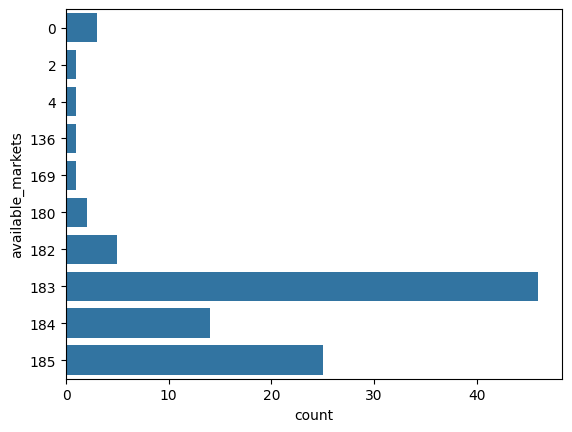

In [16]:
sns.countplot(data=billboard_hot_100_df_cleaned, y='available_markets')

#### A: The most common number of available markets for songs on the Billboard Hot 100 chart is 183 countries, with 46 songs available in 183 countries. However, I noticed that 3 songs had an available market of 0, which doesn't make sense because how can a song chart if there are no available markets to listen to it. For example, Liar by Jelly Roll is one of the songs that has an available market of 0 in Spotify's API data, but I can play it on the Spotify app. The data in the Spotify API does not completely cover information about every song.

## Data from CSV
I found a Billboard Hot 100 csv file on Kaggle. This dataset contains all billboard hot 100 songs chart from Janurary, 2000 to December 4th, 2024.
https://www.kaggle.com/datasets/ludmin/billboard

## Step 1: Import and Clean Up Data

In [17]:
hot100_df = pd.read_csv('hot100.csv')
hot100_df.head()

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
0,1/5/2000,Smooth,Santana Featuring Rob Thomas,1,1,1,24,https://charts-static.billboard.com/img/1969/0...
1,1/5/2000,Back At One,Brian McKnight,2,2,2,20,https://charts-static.billboard.com/img/1999/0...
2,1/5/2000,I Wanna Love You Forever,Jessica Simpson,3,3,3,13,https://charts-static.billboard.com/img/1999/1...
3,1/5/2000,My Love Is Your Love,Whitney Houston,4,4,4,19,https://charts-static.billboard.com/img/1984/0...
4,1/5/2000,Hot Boyz,"Missy ""Misdemeanor"" Elliott Featuring NAS| EVE...",5,7,5,7,https://charts-static.billboard.com/img/2017/0...


The image URl is not a necessary information about the song rankings, we will drop the column

In [18]:
hot100_df.drop('Image URL', axis=1, inplace=True)
hot100_df.head()

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts
0,1/5/2000,Smooth,Santana Featuring Rob Thomas,1,1,1,24
1,1/5/2000,Back At One,Brian McKnight,2,2,2,20
2,1/5/2000,I Wanna Love You Forever,Jessica Simpson,3,3,3,13
3,1/5/2000,My Love Is Your Love,Whitney Houston,4,4,4,19
4,1/5/2000,Hot Boyz,"Missy ""Misdemeanor"" Elliott Featuring NAS| EVE...",5,7,5,7


## Step 2: Analyze Data

### Q: Which 3 songs have the most weeks in charts in the history

In [20]:
most_weeks_in_charts = hot100_df.sort_values(by=['Weeks in Charts'],ascending=False)
most_weeks_in_charts.head(3)

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts
118920,10/19/2022,Heat Waves,Glass Animals,21,20,1,91
113019,9/1/2021,Blinding Lights,The Weeknd,20,21,1,90
118819,10/12/2022,Heat Waves,Glass Animals,20,19,1,90


#### A: The songs "Heat Waves", "Blinding Lights", and "Radioactive", with "Heat Waves" having a record of 91 weeks on Billboard Hot 100 chart.

### Q: Which top 3 artists have the most songs on chart.

In [21]:
most_in_chart_artist = hot100_df.groupby('Artist')['Song'].nunique()
result = most_in_chart_artist.sort_values(ascending=False)
result.head(3)

Artist
Taylor Swift    233
Glee Cast       183
Drake           148
Name: Song, dtype: int64

#### A: Taylor Swift, Glee Cast, and Drake are the top three artists having the most songs on Billboard Hot 100 charts in the history.